# Agentic customer support framework designed with LangGraph, Streaming, and RAG facilitated by LLMs

In [ ]:
"""
# Application title:
Agentic customer support smart platform using LangGraph with Streaming, and RAG supported by LLMs

# Target:
The main goals of this project are to make an end to end Agentic LLM pipeline with LangGraph, streaming, and RAG powered by LLMs. This workflow considers:
•	Identify customer questions
•	Find proper paths using sentimental analysis
•	Advance unresolved questions to human agents
•	Assign customer questions according to customized AI agents such as Tech, Billing, General.
•	Facilitate streaming and non-streaming processing
•	Apply Retrieval-Augmented Generation (RAG) for knowledge based on results.
•	Sustain a real-world focused system layout

# Libraries and Frameworks:
•	Python | jupyter notebook |
•	LangChain | ChatOpenAI (LLMs) | LangGraph
•	Vector database
•	Prompt engineering
•	Streaming processing   Workflow
•	Memory Storage for pipeline

# Notable features:
•	Agentic AI workflow with LangGraph
•	Context focused routing
•	RAG enabled results
•	Human inspection
•	Streaming and non-streaming operations
•	End-to-end case testing
•	Operationally optimized framework
•	Workflow supported examples (Tech Support, Billing, General Inquiry)

"""

# Load LLM workflow components for Agentic AI systems

In [1]:
!pip install langchain==0.3.14

In [2]:
!pip install langchain-community==0.3.14

In [3]:
!pip install langchain-openai==0.3.0

In [4]:
!pip install langgraph==0.2.64

In [ ]:
#!pip install langgraph==1.0.4

In [5]:
import os
from getpass import getpass

os.environ['OPENAI_API_KEY'] = getpass('put OpenAI API key: ')

put OpenAI API key: ··········


# Load information from outside files from where the AI can answer user questions

In [6]:
!pip install --quiet gdown


In [7]:
!gdown 1CWHutosAcJ6fiddQW5ogvg7NgLstZJ9j

Downloading...
From: https://drive.google.com/uc?id=1CWHutosAcJ6fiddQW5ogvg7NgLstZJ9j
To: /content/router_agent_documents.json
100% 7.99k/7.99k [00:00<00:00, 17.9MB/s]


# AI is just looking for a well-organized dataset where I can load my vector database.

In [8]:
# Load information from a JSON file. AI can answer user questions using company data.

import json
with open('./router_agent_documents.json', 'r') as read:
  external_data = json.load(read)
external_data[:5]

[{'text': 'Question: How do I integrate your AI product with my existing CRM system? Answer: You can integrate our AI product with your CRM using our API. Refer to the API documentation available on our website for step-by-step guidance.',
  'metadata': {'category': 'technical'}},
 {'text': 'Question: What programming languages are supported by your SDK? Answer: Our SDK supports Python, Java, and JavaScript. Additional language support is planned for future updates.',
  'metadata': {'category': 'technical'}},
 {'text': 'Question: Can your AI models run on-premise? Answer: Yes, our AI models can be deployed on-premise. We provide deployment guides for various environments.',
  'metadata': {'category': 'technical'}},
 {'text': 'Question: Does your hardware support edge AI applications? Answer: Yes, our hardware is optimized for edge AI, with low-latency processing and energy-efficient designs.',
  'metadata': {'category': 'technical'}},
 {'text': 'Question: How do I troubleshoot issues w

In [9]:
# For vector database processing, we need to change external data into LangChain document.

from langchain.schema import Document
from tqdm import tqdm

prepared_documents = []

for document_data in tqdm(external_data ):

  document_data_text = document_data['text']
  document_data_metadata = document_data['metadata']
  prepared_documents.append(Document( metadata = document_data_metadata, page_content = document_data_text))

prepared_documents[:4]


100%|██████████| 30/30 [00:00<00:00, 72357.17it/s]


[Document(metadata={'category': 'technical'}, page_content='Question: How do I integrate your AI product with my existing CRM system? Answer: You can integrate our AI product with your CRM using our API. Refer to the API documentation available on our website for step-by-step guidance.'),
 Document(metadata={'category': 'technical'}, page_content='Question: What programming languages are supported by your SDK? Answer: Our SDK supports Python, Java, and JavaScript. Additional language support is planned for future updates.'),
 Document(metadata={'category': 'technical'}, page_content='Question: Can your AI models run on-premise? Answer: Yes, our AI models can be deployed on-premise. We provide deployment guides for various environments.'),
 Document(metadata={'category': 'technical'}, page_content='Question: Does your hardware support edge AI applications? Answer: Yes, our hardware is optimized for edge AI, with low-latency processing and energy-efficient designs.')]

# To create a vector database, we need to make embeddings for text documents.

In [10]:
# # load a vector database like ChromaDB library
!pip install chromadb

In [11]:
from langchain_openai import OpenAIEmbeddings
Openai_text_embedding_model = OpenAIEmbeddings(model = 'text-embedding-3-small')

In [12]:
from langchain.vectorstores import Chroma

# With cosine similarity, text embeddings are compared.
company_vector_db = Chroma.from_documents(embedding = Openai_text_embedding_model, documents = prepared_documents,
                                          collection_metadata = {'hnsw:space': 'cosine'}, persist_directory = './company_data',
                                          collection_name = 'company_data')


In [13]:
company_data_lookup = company_vector_db.as_retriever(search_type = 'similarity_score_threshold', search_kwargs = {'k': 4, 'score_threshold': 0.3})

# Access Company billing and support information

In [14]:
query = 'How do I contact customer support?'
general_data_filter = {'category' : 'general'}

company_data_lookup.search_kwargs['filter'] = general_data_filter
company_data_lookup.invoke(query)

[Document(metadata={'category': 'general'}, page_content='Question: How do I contact customer support? Answer: You can contact our support team via email at support@example.com or call us at 1-800-123-4567.'),
 Document(metadata={'category': 'general'}, page_content='Question: How do I contact customer support? Answer: You can contact our support team via email at support@example.com or call us at 1-800-123-4567.'),
 Document(metadata={'category': 'general'}, page_content='Question: How do I escalate an unresolved issue? Answer: You can escalate unresolved issues by emailing our escalation team at escalations@example.com.'),
 Document(metadata={'category': 'general'}, page_content='Question: How do I escalate an unresolved issue? Answer: You can escalate unresolved issues by emailing our escalation team at escalations@example.com.')]

In [15]:
query = 'Tell your user which payment method you can accept.'
bill_data_filter = {'category': 'billing'}

company_data_lookup.search_kwargs["filter"] = bill_data_filter
output = company_data_lookup.invoke(query)

for item in output:
    print(item.page_content)


Question: What payment methods do you accept? Answer: We accept credit cards, PayPal, and wire transfers for corporate accounts.
Question: What payment methods do you accept? Answer: We accept credit cards, PayPal, and wire transfers for corporate accounts.
Question: How do I update my billing information? Answer: You can update your billing information from the 'Billing' section in your account dashboard.
Question: How do I update my billing information? Answer: You can update your billing information from the 'Billing' section in your account dashboard.


# Customer support interaction structure

In [16]:
from typing import TypedDict

class Support_Interaction_Record(TypedDict):
  user_question: str
  question_type: str
  question_sentiment: str
  agent_reply: str
  user_id: str

In [17]:
from pydantic import BaseModel
from typing import Literal
class Question_Feeling(BaseModel):
  feeling: Literal['Good', 'Average', 'Bad']

In [18]:
class Question_Type(BaseModel):
  inquiry_type: Literal['Charges', 'Miscellaneous', 'Tech Support']

# Node functions for making a customer support pipeline

In [19]:
from langchain_openai import ChatOpenAI

chatopenai_llm = ChatOpenAI(model = 'gpt-4o', temperature=0)

In [20]:
def classify_question(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
    """
    Classify the customer question into Charges, Miscellaneous, or Tech Support
    """

    query = support_state['user_question']
    prompt = f'''
    You are an experienced customer support agent for an AI products and hardware company. You can easily categorize the customer questions.
    Please take your time to review the customer questions. Finally, you need to categorize questions into one of the following.

    'Charges', 'Miscellaneous', 'Tech Support'
    .
    Make sure you must return one category name only.


    Question:
    {query}
    '''

    inquiry_category = chatopenai_llm.with_structured_output(Question_Type).invoke(prompt)

    return {'question_type': inquiry_category.inquiry_type}



In [21]:
# Check: is this function working?
classify_question({"user_question": 'Tell your user which payment methods you can consider.'})

{'question_type': 'Charges'}

In [22]:
classify_question({'user_question': 'Please provide me your working office hours.'})

{'question_type': 'Miscellaneous'}

In [23]:
def sentiment_analysis_node(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
  '''
  Research on sentimental options such as Good, Average, and Bad on customer’s questions.
  '''
  query = support_state['user_question']


  prompt = f'''
  You are an experienced customer support agent for an AI products and hardware company. You can easily categorize the overall customer sentiment
  Please take your time to review the customer questions as given below. Finally, you need to categorize the sentiment into one of the following
  customer sentiment options.

  'Good', 'Average', 'Bad'

  Make sure you return one of the sentiment labels.
  Question:{query}
  '''
  sentiment_response = chatopenai_llm.with_structured_output(Question_Feeling).invoke(prompt)

  return {'question_sentiment': sentiment_response.feeling}


In [24]:
# Test the above function
sentiment_analysis_node({"user_question": 'Thank you. I appreciate your support.'})

{'question_sentiment': 'Good'}

In [25]:
sentiment_analysis_node({"user_question": 'Unfortunately, your product number (10) does not work for my AI project. Please refund the amount you charged me for this product. Thank you for understanding.'})

{'question_sentiment': 'Bad'}

In [65]:
from langchain_core.prompts import ChatPromptTemplate

# Solve questions associated with technical issues only

def generate_tech_support_reply(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
  '''
  Solve technical support questions.
  '''
  # Solve queries only on technical assistance
  question_type = support_state['question_type']
  question = support_state['user_question']

  if question_type == 'Tech Support':
    company_data_lookup.search_kwargs['filter'] = {'category': 'technical'}
    context_documents = company_data_lookup.invoke(question)
    document_text = '\n\n'.join(document.page_content for document in context_documents)
    if not document_text:
      document_text = 'if you could not find specific KB information. You need to answer user questions within general technical knowledge.'


    prompt = ChatPromptTemplate.from_template(
        '''
        You worked a long time as a technical support worker. Please answer customer questions. If you do not know the right answer, you need to
        provide a contact number to customer. Customer can use that number to solve the problem.

        Question:{question}
        supporting_context:{document_text}
        ''' )

    support_reply = (prompt | chatopenai_llm).invoke({'question': question, 'document_text': document_text}).content

  else:

    support_reply = 'Sorry. I could not solve your problem. Please contact the customer support center as soon as possible. They have some options to solve your problem immediately. Take care.'

  return {'agent_reply': support_reply}


In [66]:
# Check the above function

query_one = 'I have an AI device. I need to connect my device to company settings, but I do not know how I can connect. Please provide me step by step guidelines to connect my device company settings.'
generate_tech_support_reply({ 'question_type': 'Tech Support', 'user_question': query_one})


{'agent_reply': "To connect your AI device to your company settings, you will typically need to follow these general steps. However, please note that the exact steps can vary depending on the specific device and company infrastructure:\n\n1. **Network Connection**: Ensure your device is connected to the company network. This might involve connecting to a specific Wi-Fi network or using an Ethernet cable.\n\n2. **Access Device Settings**: Go to the settings menu on your AI device. This is usually accessible through a touchscreen interface or a web portal.\n\n3. **Authentication**: You may need to authenticate your device with your company’s network. This could involve entering a username and password, or using a company-provided authentication token.\n\n4. **Configuration**: Navigate to the configuration settings. You might need to enter specific details such as server addresses, port numbers, or other network settings provided by your IT department.\n\n5. **Software Update**: Ensure th

In [79]:
# using a function to solve user billing questions

def resolve_billing_request(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
    '''
    Generate a billing support response using the company knowledge base.
    '''
    question_type = support_state['question_type']
    question = support_state['user_question']

    # Look at billing information only in vector database
    if question_type == 'Charges':
        company_data_lookup.search_kwargs['filter'] = {'category': 'billing'}
        context_documents = company_data_lookup.invoke(question)
        document_text = '\n\n'.join(document.page_content for document in context_documents)
        if not document_text:
          document_text = 'if you could not find specific billing Knowledge base (KB) information. You need to answer user billing questions using general billing and subscription rules.'


        # LLM is waiting for prompt from users.
        prompt = ChatPromptTemplate.from_template(
            '''
            You worked a long time as a billing support helper. Please answer customer billing questions. If you do not know the right answer, you
            need to provide a contact number to customers. Customers can use that number to solve their billing problem.

            Question: {question}
            supporting_context: {document_text}
            '''
        )
        billing_reply = (prompt | chatopenai_llm).invoke({'question': question, 'document_text': document_text}).content

    else:
        billing_reply = 'Sorry. I could not solve your billing problem. Please contact the customer support center as soon as possible. They have some options to solve your problem immediately. Take care.'

    return {'agent_reply': billing_reply}


In [29]:
query_two = ' Tell me which payment methods you can accept from me. Can I get a refund if I am going to cancel my subscription to your companey?'

billing_request = {'user_question': query_two, 'question_type': 'Charges', 'agent_reply': '', 'question_sentiment': 'Average', 'user_id': '1350987'}

billing_request_result = resolve_billing_request(billing_request)

print(billing_request_result)


{'agent_reply': 'We accept credit cards, PayPal, and wire transfers for corporate accounts. Regarding refunds, they are provided based on our refund policy. Please refer to our Terms and Conditions for more details. If you have further questions or need assistance, please contact our billing support team at [insert contact number here].'}


In [95]:
# Processing customer general questions

def resolve_general_inquiry(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
  '''
  Making general support result
  '''
  question_type = support_state['question_type']
  question = support_state['user_question']

  # General inquiries solver
  if question_type == 'Miscellaneous':
    company_data_lookup.search_kwargs['filter'] = {'category': 'general'}
    context_documents = company_data_lookup.invoke(question)
    document_text = '\n\n'.join(document.page_content for document in context_documents)
    if not document_text:
      document_text = ('if you could not find relevant Knowledge base (KB) information,'
       'you need to answer user questions using basic company resources including professional standards.')

    prompt = ChatPromptTemplate.from_template(
        '''
        You worked for a long time as a customer support helper. Please answer customer general questions. If you do not know the right answer, you
        need to provide a contact number to customers. Customers can use that number to solve their general problem.

        Question: {question}
        supporting_context: {document_text}
        ''')
    general_reply = (prompt | chatopenai_llm).invoke({'question': question, 'document_text': document_text}).content

  else:
    general_reply = ('Sorry. I could not solve your general questions. Please contact the customer support center as soon as possible.'
    'They have some options to solve your problem immediately. Take care.')
  return {'agent_reply': general_reply}


In [96]:
# Test the above function

general_question = "Before buying a product from your company, I would like to know about your refund policy. Please provide your refund policy clearly."

general_test_state = {'user_question': general_question, 'question_type': 'Miscellaneous', 'question_sentiment': 'Average',
                      'agent_reply': '', 'user_id': '18967342'}
generate_general_response = resolve_general_inquiry(general_test_state)

print(generate_general_response)


{'agent_reply': 'Our refund policy offers a 30-day money-back guarantee for all our products. If you need to initiate a refund, please contact our support team. If you have any further questions or need assistance, you can reach our customer support at [Customer Support Contact Number].'}


In [97]:
# Forward unhappy customer questions to human agent

def transfer_to_human_agent(support_state: Support_Interaction_Record) -> Support_Interaction_Record:
  '''
  As customer sentiment is Bad, customers questions forward into human support group.
  '''
  return {'agent_reply': ('I am going to forward your question immediately to a human support group.'
  'Someone from this group supports you as soon as possible.')}


In [98]:
# Route customer queries according to sentiment as well as category

def route_customer_query(support_state: Support_Interaction_Record) -> str:
  '''
  Find appropriate path for each customer question
  '''
  if support_state['question_sentiment'] == 'Bad':
    return 'transfer_to_human_agent'
  elif support_state['question_type'] == 'Tech Support':
    return 'generate_tech_support_reply'
  elif support_state['question_type'] == 'Charges':
    return 'resolve_billing_request'
  else:
    return 'resolve_general_inquiry'


In [99]:
# check the aove function

query = 'I have an AI device. I cannot connect this device to the company settings.'

query_check_route = {'user_question': 'query', 'question_type': 'Device Support', 'question_sentiment': 'Average', 'agent_reply': '', 'user_id': '3785690'}

fina_route = route_customer_query(query_check_route)

print(fina_route)


resolve_general_inquiry


# Connecting all parts to make the workflow

In [100]:
from langgraph.graph import StateGraph
customer_support_graph = StateGraph(Support_Interaction_Record)


In [101]:
customer_support_graph.add_node('classify_question', classify_question)
customer_support_graph.add_node('sentiment_analysis_node', sentiment_analysis_node)
customer_support_graph.add_node('generate_tech_support_reply', generate_tech_support_reply)
customer_support_graph.add_node('resolve_billing_request', resolve_billing_request)
customer_support_graph.add_node('resolve_general_inquiry', resolve_general_inquiry)
customer_support_graph.add_node('transfer_to_human_agent', transfer_to_human_agent)

In [102]:
customer_support_graph.add_edge('classify_question', 'sentiment_analysis_node')

In [103]:
customer_support_graph.add_conditional_edges('sentiment_analysis_node', route_customer_query,
 ['generate_tech_support_reply', 'resolve_billing_request', 'resolve_general_inquiry', 'transfer_to_human_agent'])

In [104]:
from langgraph.graph import END
customer_support_graph.add_edge('generate_tech_support_reply', END)
customer_support_graph.add_edge('resolve_billing_request', END)
customer_support_graph.add_edge('resolve_general_inquiry', END)
customer_support_graph.add_edge('transfer_to_human_agent', END)

In [105]:
customer_support_graph.set_entry_point('classify_question')

In [106]:
from langgraph.checkpoint.memory import MemorySaver
memory_saver = MemorySaver()
customer_support_pipeline = customer_support_graph.compile(checkpointer = memory_saver)


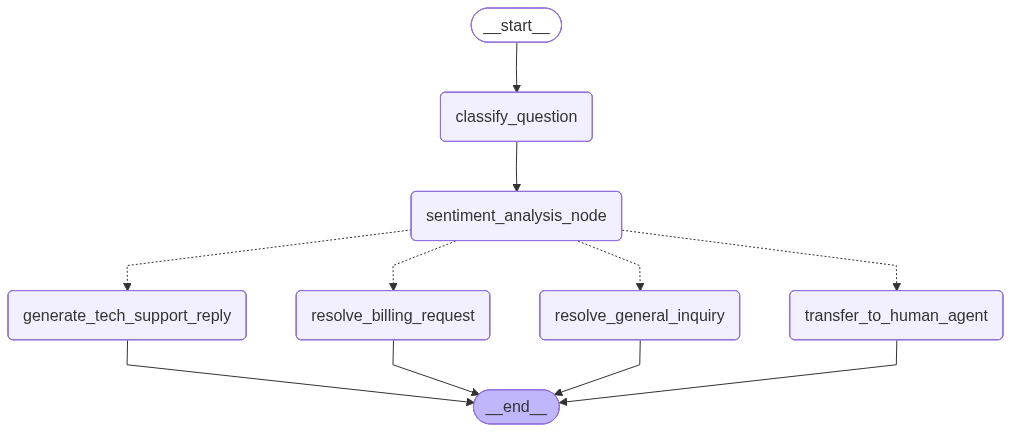

In [107]:
from IPython.display import display, Image

customer_support_pipeline_image = customer_support_pipeline.get_graph().draw_mermaid_png()
display(Image(customer_support_pipeline_image))


# Process customer support pipeline

In [108]:
from IPython.display import display, Markdown
def customer_support_workflow_process(agent, user_question, user_id, verbose=False):
  graph_items = agent.stream({'user_question': user_question}, { 'configurable': {'thread_id': user_id}}, stream_mode = 'values')
  last_item = None
  for item in graph_items:
    last_item = item
    if verbose:
      print(item)
  display(Markdown(last_item['agent_reply']))


# Testing for end to end customer support pipeline

In [77]:
# Check query with 'Tech Support'
customer_support_workflow_process(agent = customer_support_pipeline,
                                  user_question = 'I am interested in using pre-trained AI models. Can I use them in your system?',
                                  user_id = '1378621', verbose = True)


{'user_question': 'I am interested in using pre-trained AI models. Can I use them in your system?'}
{'user_question': 'I am interested in using pre-trained AI models. Can I use them in your system?', 'question_type': 'Tech Support'}
{'user_question': 'I am interested in using pre-trained AI models. Can I use them in your system?', 'question_type': 'Tech Support', 'question_sentiment': 'Good'}
{'user_question': 'I am interested in using pre-trained AI models. Can I use them in your system?', 'question_type': 'Tech Support', 'question_sentiment': 'Good', 'agent_reply': 'Yes, you can use pre-trained AI models in our system. We offer a range of pre-trained models for various use cases such as natural language processing (NLP), computer vision, and recommendation systems. Additionally, our platform supports model fine-tuning using your custom datasets, allowing you to tailor the models to better suit your specific needs. If you have any further questions or need assistance, please feel free

Yes, you can use pre-trained AI models in our system. We offer a range of pre-trained models for various use cases such as natural language processing (NLP), computer vision, and recommendation systems. Additionally, our platform supports model fine-tuning using your custom datasets, allowing you to tailor the models to better suit your specific needs. If you have any further questions or need assistance, please feel free to contact our support team at [insert contact number here].

In [94]:
# billing question

billing_question = (
    'I need to cancel my subscription.'
    'Can I get a refund?  What refund methods do you expect from your office?'
)

customer_support_workflow_process(agent = customer_support_pipeline, user_question = billing_question, user_id = '1478629', verbose=True)


{'user_question': 'I need to cancel my subscription.Can I get a refund?  What refund methods do you expect from your office?', 'question_type': 'Charges', 'question_sentiment': 'Bad', 'agent_reply': 'I am going to forward your question immediately to a human support group.Someone from this group supports you as soon as possible.'}
{'user_question': 'I need to cancel my subscription.Can I get a refund?  What refund methods do you expect from your office?', 'question_type': 'Charges', 'question_sentiment': 'Bad', 'agent_reply': 'I am going to forward your question immediately to a human support group.Someone from this group supports you as soon as possible.'}
{'user_question': 'I need to cancel my subscription.Can I get a refund?  What refund methods do you expect from your office?', 'question_type': 'Charges', 'question_sentiment': 'Average', 'agent_reply': 'I am going to forward your question immediately to a human support group.Someone from this group supports you as soon as possible.

To cancel your subscription and inquire about a refund, you will need to refer to our refund policy as outlined in our Terms and Conditions. Refunds for unused subscription periods are provided based on this policy. The refund methods typically include crediting the original payment method or providing account credits, but this can vary depending on the specific terms of your subscription agreement.

If you need further assistance or specific details about your account, please contact our billing support team at [insert contact number here]. They will be able to provide you with more personalized assistance regarding your refund and cancellation process.

In [110]:
# Choose general questions
general_question = (
    'Please list a number of services offered by your company,'
    'and also provide me some links which I can use to find more details about them.')

customer_support_workflow_process(agent = customer_support_pipeline, user_question = general_question, user_id = 'g3498097', verbose = True)

{'user_question': 'Please list a number of services offered by your company,and also provide me some links which I can use to find more details about them.', 'question_type': 'Miscellaneous', 'question_sentiment': 'Good', 'agent_reply': "I'm sorry, but I don't have specific information about the services offered by your company or the links to find more details about them. However, I recommend contacting your company's customer service or visiting their official website for comprehensive information. If you need further assistance, please call the customer support number provided by your company."}
{'user_question': 'Please list a number of services offered by your company,and also provide me some links which I can use to find more details about them.', 'question_type': 'Miscellaneous', 'question_sentiment': 'Good', 'agent_reply': "I'm sorry, but I don't have specific information about the services offered by your company or the links to find more details about them. However, I recomme

I'm sorry, but I don't have specific information about the services offered by your company or the links to find more details about them. However, I recommend contacting your company's customer service or visiting their official website for comprehensive information. If you need further assistance, please reach out to the customer support team at [Customer Support Phone Number]. They should be able to provide you with the necessary details and links.

In [ ]:
"""
# Closing remarks:
I have clearly shown a fully functional Agentic AI system. It supports:
•	 End to end workflow with memory
•	 LLM Processing
•	RAG supported access
•	Real time monitoring
•	Logic supported decision flow
•	Supervised action
•	Using LangGraph to make end to end workflow.

"""